# Data exploration

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from getABSDData import getABSDDataFrames

import warnings
warnings.filterwarnings("ignore")

In [2]:
DATASET_FOLDER = "data"
TRAINING_ANNOTATION_FILE = os.path.join(DATASET_FOLDER, "train_ship_segmentations.csv")
TEST_ANNOTATION_FILE = os.path.join(DATASET_FOLDER, "test_ship_segmentations.csv")

#Getting original train-test dataframes
df_orig_train = pd.read_csv(TRAINING_ANNOTATION_FILE)
df_orig_test = pd.read_csv(TEST_ANNOTATION_FILE)

# Getting train-dev-test splitted dataframes
df_train, df_dev, df_test = getABSDDataFrames()

#Creating a dictionary for later use of iterating through every dataframe and plotting the current distribution
dataframes = {"Original Train": df_orig_train, "Original Test": df_orig_test, "Splitted Train": df_train, "Splitted Dev": df_dev, "Splitted Test": df_test}

# Ship count distribution per image

In [3]:
"""Plots the distribution of the number of ships per image"""
def ship_count_distribution(df, name):
    '''
    df: dataframe
    name: name of dataframe, used for title of plot

    '''
    
    #Grouping the dataframe by image id, counting the number of annotations per image
    df['ship_count'] = df.groupby('ImageId')['ImageId'].transform('count')
    #Setting the number to 0, where no ships are present
    df.loc[df['EncodedPixels'].isnull().values,'ship_count'] = 0
    #Printing out the number of images
    print("Number of images without ships: %d" % df.loc[df['ship_count']==0].shape[0])
    
    #Grouping the ship count by image id
    ship_count_dist = df.groupby('ImageId')['ship_count'].unique().transform(lambda x: x[0])
    
    #Plotting the distribution with help of seaborn
    plt.figure()
    sns.set_style("white")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.distplot(ship_count_dist,kde=False)
    plt.title('Ship Count Distribution in %s Set' % name)
    
    #Printing the description of distribution(different statistical values)
    print(ship_count_dist.describe())
    plt.show()

Number of images without ships: 75000
count    104070.000000
mean          0.538388
std           1.337660
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          15.000000
Name: ship_count, dtype: float64


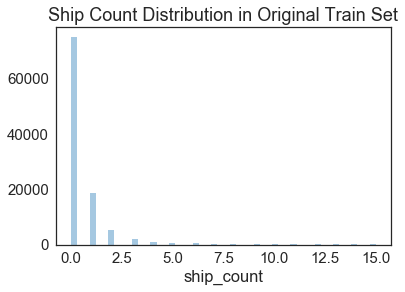

Number of images without ships: 75000
count    88486.000000
mean         0.290362
std          0.995581
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: ship_count, dtype: float64


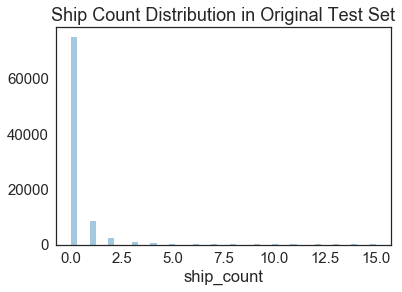

Number of images without ships: 105162
count    135174.000000
mean          0.425392
std           1.197531
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          15.000000
Name: ship_count, dtype: float64


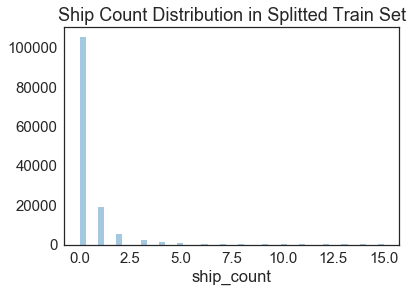

Number of images without ships: 29799
count    38126.000000
mean         0.419294
std          1.193767
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: ship_count, dtype: float64


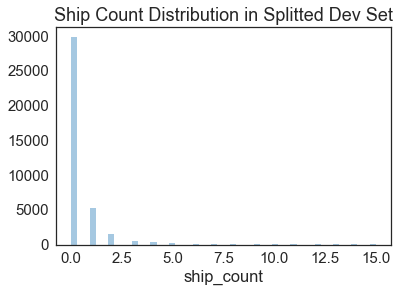

Number of images without ships: 15039
count    19256.000000
mean         0.427659
std          1.220427
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: ship_count, dtype: float64


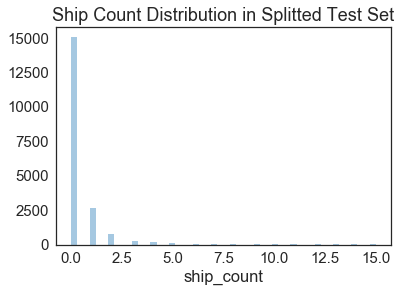

In [4]:
#Plotting for every dataframe
for name,df in dataframes.items():
    ship_count_distribution(df, name)

# Ship area size distribution

## Per ship

### With annotations of images without ships taken as well

In [5]:
"""Plots the distribution of area size of ships per ship/annotation"""
def area_distribution_per_ship(df, name):
    '''
    df: dataframe
    name: name of dataframe, used for title of plot

    '''
    
    #Getting the sum of ship segmentation pixel sizes per annotation
    #In order to do that, split the EncodedPixels, take every second, from the second element on
    #Convert them to float from string, then sum them
    #Give a new 'on_ship_area' column this value
    df['one_ship_area'] = df['EncodedPixels'].map(lambda x: sum(float(i) for i in str(x).split()[1::2]))
    
    #Plotting the distribution with help of seaborn
    plt.figure()
    sns.set_style("white")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.distplot(df['one_ship_area'],kde=False)
    plt.title('Ship Area Size Distribution Per Ship in %s Set' % name)

    #Printing the description of distribution(different statistical values)
    print(df['one_ship_area'].describe())
    plt.show()

count    131030.000000
mean        669.426818
std        2019.020543
min           0.000000
25%           0.000000
50%           0.000000
75%         243.000000
max       25904.000000
Name: one_ship_area, dtype: float64


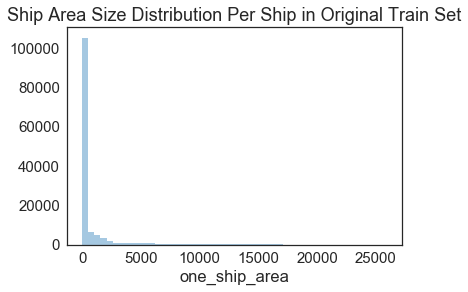

count    100693.000000
mean        400.999742
std        1581.464881
min           0.000000
25%           0.000000
50%           0.000000
75%          24.000000
max       24216.000000
Name: one_ship_area, dtype: float64


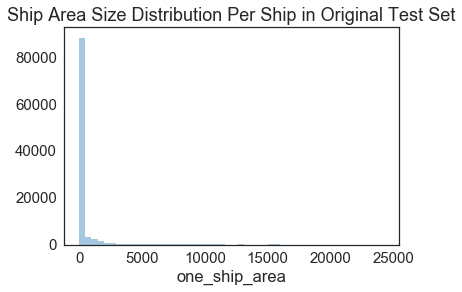

count    162664.000000
mean        554.540992
std        1848.129151
min           0.000000
25%           0.000000
50%           0.000000
75%         134.000000
max       25904.000000
Name: one_ship_area, dtype: float64


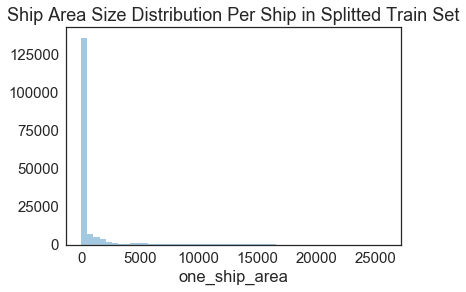

count    45785.000000
mean       545.182505
std       1826.648422
min          0.000000
25%          0.000000
50%          0.000000
75%        128.000000
max      25245.000000
Name: one_ship_area, dtype: float64


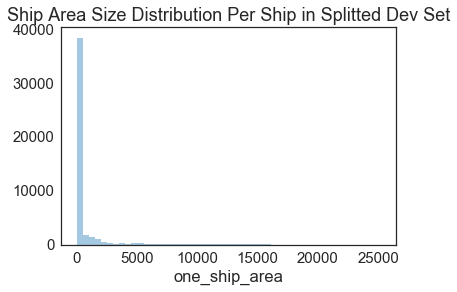

count    23274.000000
mean       555.462147
std       1873.769631
min          0.000000
25%          0.000000
50%          0.000000
75%        132.000000
max      25904.000000
Name: one_ship_area, dtype: float64


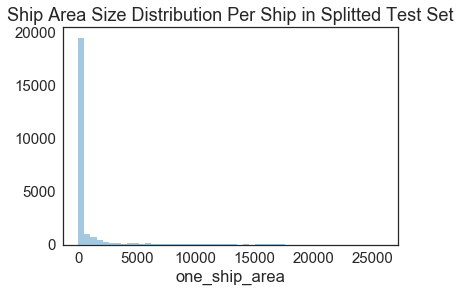

In [6]:
#Plotting for every dataframe
for name,df in dataframes.items():
    area_distribution_per_ship(df, name)

### Only with annotations of ships that actually exist

In [7]:
"""Plots the distribution of area size of ships per ships which actually exist"""
def area_distribution_per_ship_without_zeros(df, name):
    '''
    df: dataframe
    name: name of dataframe, used for title of plot

    '''
    
    #Take the values, where one_ship_area is not zero
    one_ship_area_without_zeros = df.loc[df['one_ship_area'] != 0, 'one_ship_area']

    #Plotting the distribution with help of seaborn
    plt.figure()
    sns.set_style("white")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.distplot(one_ship_area_without_zeros,kde=False)
    plt.title('Ship Area Size Distribution Per Ship in %s Set(only where ships exist)' % name)
    
    #Printing the description of distribution(different statistical values)
    print(one_ship_area_without_zeros.describe())
    plt.show()

count    56030.000000
mean      1565.500553
std       2851.370259
min          2.000000
25%        111.000000
50%        403.000000
75%       1541.000000
max      25904.000000
Name: one_ship_area, dtype: float64


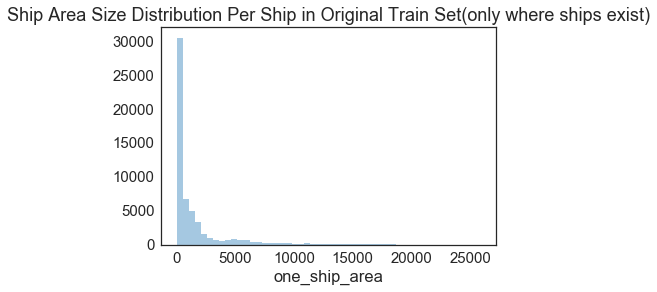

count    25693.000000
mean      1571.551279
std       2821.768875
min          2.000000
25%        112.000000
50%        425.000000
75%       1568.000000
max      24216.000000
Name: one_ship_area, dtype: float64


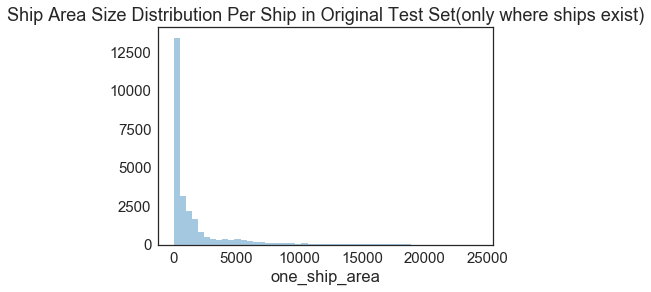

count    57502.000000
mean      1568.708149
std       2841.000593
min          2.000000
25%        111.000000
50%        412.000000
75%       1549.000000
max      25904.000000
Name: one_ship_area, dtype: float64


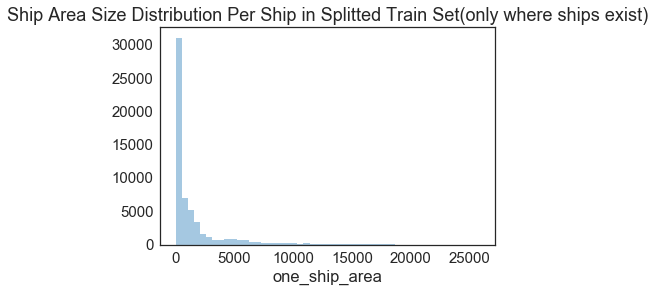

count    15986.000000
mean      1561.440073
std       2823.091040
min          2.000000
25%        109.000000
50%        399.500000
75%       1553.750000
max      25245.000000
Name: one_ship_area, dtype: float64


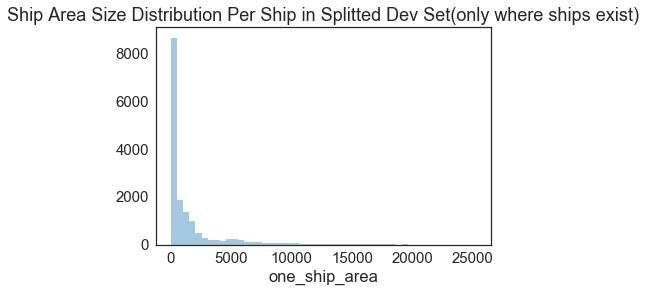

count     8235.000000
mean      1569.863509
std       2886.354296
min          2.000000
25%        111.000000
50%        407.000000
75%       1549.000000
max      25904.000000
Name: one_ship_area, dtype: float64


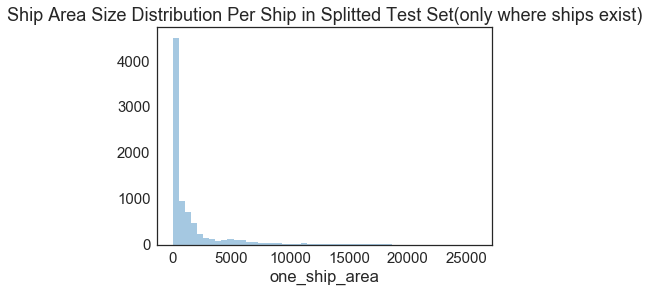

In [8]:
#Plotting for every dataframe
for name,df in dataframes.items():
    area_distribution_per_ship_without_zeros(df, name)

## Per image

### With images without ships as well

In [9]:
"""Plots the distribution of area size of ships per image"""
def area_distribution_per_image(df, name):
    '''
    df: dataframe
    name: name of dataframe, used for title of plot

    '''
    
    #Getting the sum of one_ship_area-s per image id
    df['image_ship_area'] = df.groupby('ImageId')['one_ship_area'].transform('sum')
    
    #Grouping the image_ship_area by image id
    ship_area_dist_perim = df.groupby('ImageId')['image_ship_area'].unique().transform(lambda x: x[0])
    
    #Plotting the distribution with help of seaborn
    plt.figure()
    sns.set_style("white")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.distplot(ship_area_dist_perim,kde=False)
    plt.title('Ship Area Size Distribution Per Image in %s Set' % name)
    
    #Printing the description of distribution(different statistical values)
    print(ship_area_dist_perim.describe())
    plt.show()

count    104070.000000
mean        842.846123
std        2653.057144
min           0.000000
25%           0.000000
50%           0.000000
75%          90.000000
max       76720.000000
Name: image_ship_area, dtype: float64


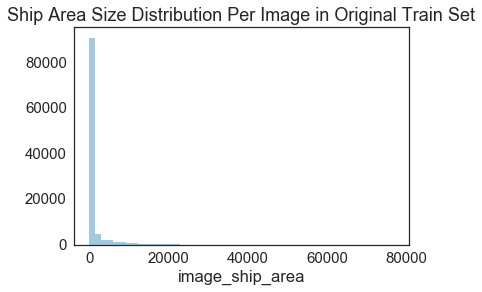

count    88486.000000
mean       456.319271
std       1999.825830
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      48556.000000
Name: image_ship_area, dtype: float64


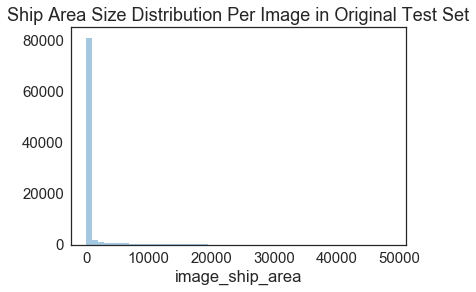

count    135174.000000
mean        667.316614
std        2387.736539
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       76720.000000
Name: image_ship_area, dtype: float64


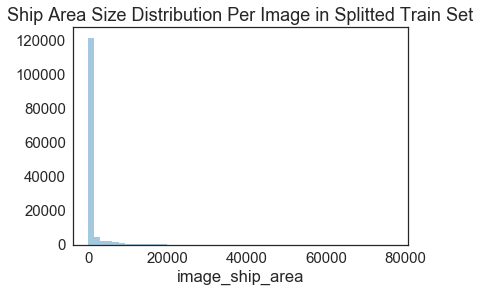

count    38126.000000
mean       654.702329
std       2353.635489
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      46004.000000
Name: image_ship_area, dtype: float64


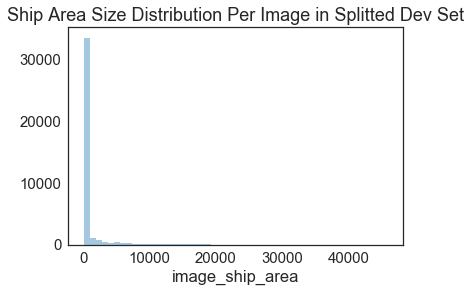

count    19256.00000
mean       671.36612
std       2408.24784
min          0.00000
25%          0.00000
50%          0.00000
75%          0.00000
max      41387.00000
Name: image_ship_area, dtype: float64


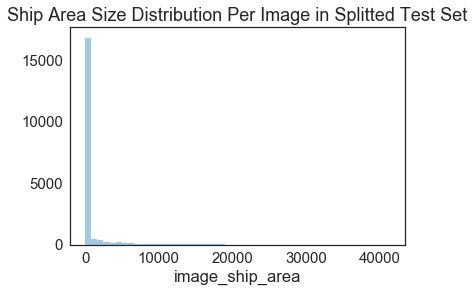

In [10]:
#Plotting for every dataframe
for name,df in dataframes.items():
    area_distribution_per_image(df, name)

### Only with images containing any ships

In [11]:
"""Plots the distribution of area size of ships per images which contain any ships"""
def area_distribution_per_image_without_zeros(df, name):
    '''
    df: dataframe
    name: name of dataframe, used for title of plot

    '''
    
    #Take the values, where image_ship_area is not zero
    image_ship_area_without_zeros = df.loc[df['image_ship_area'] != 0]
    #Grouping the image_ship_area_without_zeros by image id
    image_ship_area_without_zeros = image_ship_area_without_zeros.groupby('ImageId')['image_ship_area'].unique().transform(lambda x: x[0])
    
    #Plotting the distribution with help of seaborn
    plt.figure()
    sns.set_style("white")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.distplot(image_ship_area_without_zeros,kde=False)
    plt.title('Ship Area Size Distribution Per Ship in %s Set(only where ships exist)' % name)
    
    #Printing the description of distribution(different statistical values)
    print(image_ship_area_without_zeros.describe())
    plt.show()

count    29070.000000
mean      3017.371723
std       4317.116093
min         10.000000
25%        214.000000
50%       1242.000000
75%       4230.000000
max      76720.000000
Name: image_ship_area, dtype: float64


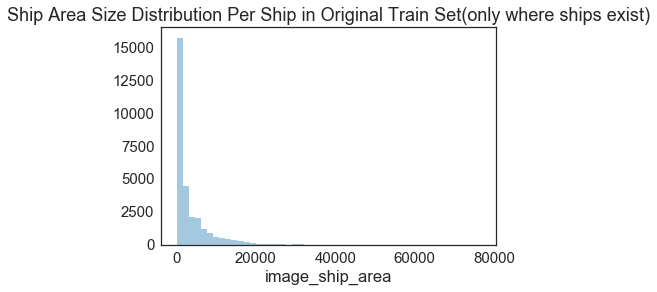

count    13486.000000
mean      2994.058060
std       4317.831525
min         10.000000
25%        212.000000
50%       1244.000000
75%       4151.000000
max      48556.000000
Name: image_ship_area, dtype: float64


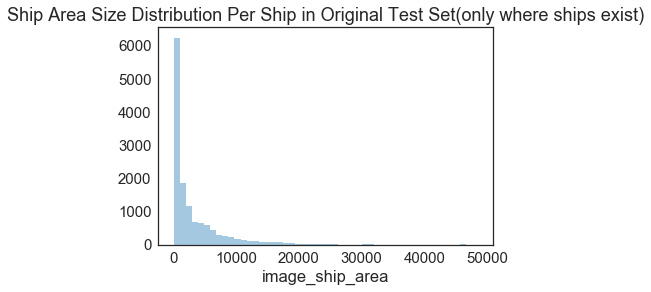

count    30012.000000
mean      3005.592963
std       4318.692693
min         10.000000
25%        213.000000
50%       1242.000000
75%       4198.250000
max      76720.000000
Name: image_ship_area, dtype: float64


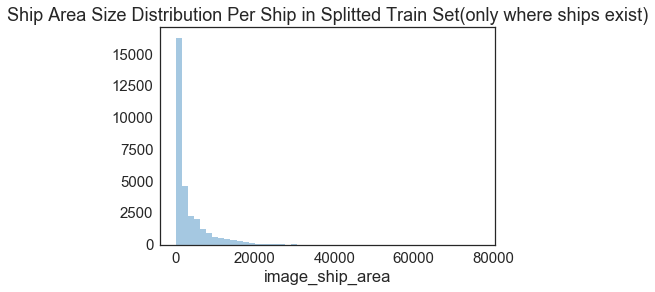

count     8327.000000
mean      2997.619911
std       4282.752880
min         10.000000
25%        213.000000
50%       1239.000000
75%       4206.000000
max      46004.000000
Name: image_ship_area, dtype: float64


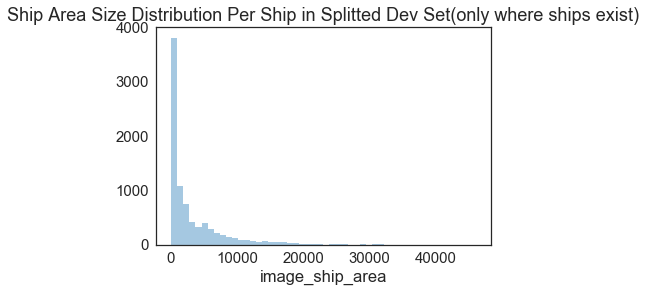

count     4217.000000
mean      3065.645245
std       4375.615551
min         10.000000
25%        215.000000
50%       1265.000000
75%       4275.000000
max      41387.000000
Name: image_ship_area, dtype: float64


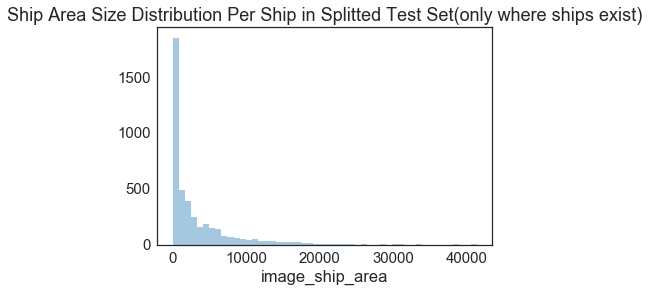

In [12]:
#Plotting for every dataframe
for name,df in dataframes.items():
    area_distribution_per_image_without_zeros(df, name)